# 離散一様分布

## 概要

離散一様分布（discrete uniform distribution）は、有限個の値それぞれを等しい確率でとる離散確率分布である。
すべての結果が同様に確からしいという仮定のもとで最も自然に現れる分布であり、確率論の基礎をなす概念でもある。

例えば、公正なサイコロを1回振ったとき、各目が出る確率はすべて等しく$1/6$となる。
これは$N=6$の離散一様分布に従う確率変数の典型的な例である。
離散一様分布は、その対称性と均一性により、等確率性を仮定するあらゆる場面で基本的な役割を果たす。

## 確率質量関数

確率変数$X$が$\{1, 2, \ldots, N\}$上の離散一様分布に従うとき、その確率質量関数（probability mass function; PMF）は

$$
P(X = x \mid N) = \frac{1}{N}, \quad x = 1, 2, \ldots, N
$$

で与えられる。ここで$N$は台（support）の要素数を表すパラメータであり、$N \geq 1$の正の整数である。

より一般的に、台が$\{a, a+1, \ldots, b\}$（$a \leq b$, $a, b \in \mathbb{Z}$）である場合には

$$
P(X = x \mid a, b) = \frac{1}{b - a + 1}, \quad x = a, a+1, \ldots, b
$$

となる。以下では簡単のため$a=1$, $b=N$の場合を扱う。

## 累積分布関数

離散一様分布の累積分布関数（cumulative distribution function; CDF）は

$$
F(x) = P(X \leq x) = \frac{\lfloor x \rfloor}{N}, \quad 1 \leq x \leq N
$$

で与えられる。ここで$\lfloor x \rfloor$は$x$を超えない最大の整数（床関数）を表す。

特に$x$が整数値$k$（$1 \leq k \leq N$）をとる場合、$F(k) = k / N$となる。

## 期待値・分散

### 期待値

$X$が$\{1, 2, \ldots, N\}$上の離散一様分布に従うとき、期待値は

$$
E[X] = \sum_{x=1}^{N} x \cdot \frac{1}{N} = \frac{1}{N} \sum_{x=1}^{N} x = \frac{1}{N} \cdot \frac{N(N+1)}{2} = \frac{N+1}{2}
$$

である。ここで$\sum_{x=1}^{N} x = N(N+1)/2$を用いた。

### 分散

分散を求めるために、まず$E[X^2]$を計算する。

$$
E[X^2] = \sum_{x=1}^{N} x^2 \cdot \frac{1}{N} = \frac{1}{N} \sum_{x=1}^{N} x^2 = \frac{1}{N} \cdot \frac{N(N+1)(2N+1)}{6} = \frac{(N+1)(2N+1)}{6}
$$

ここで$\sum_{x=1}^{N} x^2 = N(N+1)(2N+1)/6$を用いた。したがって、分散は

$$
V[X] = E[X^2] - (E[X])^2 = \frac{(N+1)(2N+1)}{6} - \left(\frac{N+1}{2}\right)^2
$$

$$
= \frac{(N+1)(2N+1)}{6} - \frac{(N+1)^2}{4} = (N+1)\left(\frac{2N+1}{6} - \frac{N+1}{4}\right)
$$

$$
= (N+1) \cdot \frac{2(2N+1) - 3(N+1)}{12} = (N+1) \cdot \frac{N-1}{12} = \frac{(N+1)(N-1)}{12} = \frac{N^2 - 1}{12}
$$

となる。

## 図

/tmp/ipykernel_7506/1647215081.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


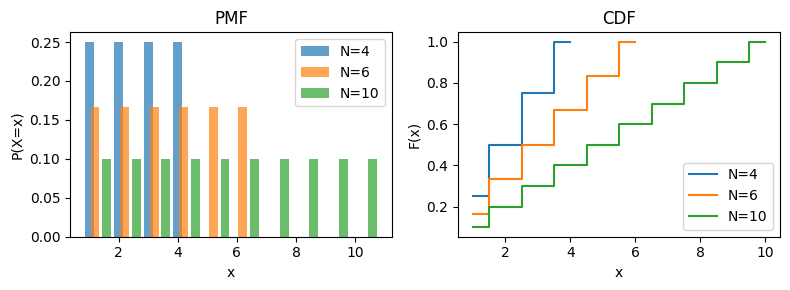

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint

fig, axes = plt.subplots(1, 2, figsize=[8, 3])

for N in [4, 6, 10]:
    x = np.arange(1, N + 1)
    pmf = randint.pmf(x, 1, N + 1)
    axes[0].bar(x + (N-4)*0.1, pmf, width=0.3, alpha=0.7, label=f"N={N}")

    cdf = randint.cdf(x, 1, N + 1)
    axes[1].step(x, cdf, where='mid', label=f"N={N}")

axes[0].set(title="PMF", xlabel="x", ylabel="P(X=x)")
axes[0].legend()
axes[1].set(title="CDF", xlabel="x", ylabel="F(x)")
axes[1].legend()
fig.tight_layout()

## 性質

### 最大エントロピー性

有限集合$\{1, 2, \ldots, N\}$上の離散確率分布のうち、離散一様分布はシャノンエントロピー

$$
H(X) = -\sum_{x=1}^{N} P(X=x) \log P(X=x)
$$

を最大にする分布である。離散一様分布のエントロピーは

$$
H(X) = -\sum_{x=1}^{N} \frac{1}{N} \log \frac{1}{N} = \log N
$$

となる。これは、台の要素数が$N$であるという制約のみのもとで、最も不確実性の高い（最も情報量の少ない）分布が一様分布であることを意味する。

### モーメント母関数

離散一様分布のモーメント母関数は

$$
M_X(t) = E[e^{tX}] = \frac{1}{N} \sum_{x=1}^{N} e^{tx} = \frac{e^t(1 - e^{tN})}{N(1 - e^t)}
$$

で与えられる（$t \neq 0$の場合）。

## 応用例

- **公正なサイコロ**: $N$面サイコロの各目が出る確率が等しいとき、出目は$\{1, 2, \ldots, N\}$上の離散一様分布に従う。
- **無作為抽出**: 母集団から各個体を等確率で選ぶ単純無作為抽出（simple random sampling）において、選ばれる個体の番号は離散一様分布に従う。
- **乱数生成**: 計算機上で整数乱数を生成する際、指定した範囲の各整数値が等確率で出現するよう設計される。これは離散一様分布に基づく。
- **古典的確率**: ラプラスの確率の定義（同様に確からしい場合の数に基づく確率）は、離散一様分布を暗黙の前提としている。
- **ハッシュ関数**: 理想的なハッシュ関数は、入力に対してハッシュ値が離散一様分布に従うことが期待される。

## 参考文献

- 久保川達也 (2017). 現代数理統計学の基礎. 共立出版.
- Casella, G. & Berger, R. L. (2001). *Statistical Inference* (2nd ed.). Duxbury Press.